In [1]:
import numpy as np
import pandas as pd

In [2]:
basic_names = ["user_id","version","minutes_play","day_1_active","day_7_active"]


In [3]:
it = 0
def Generate_Sample_data(number_of_datapoints, version):
    global it
    data = np.array([1000*it + np.arange(num_of_datapoints)+1,
                     [version]*num_of_datapoints,
                     np.random.random(size =(num_of_datapoints),) * 100 ,
                     np.random.randint(2,size = num_of_datapoints),
                     np.random.randint(2,size = num_of_datapoints)]).T
    it+=1
    return data
def create_dataframe(num_of_datapoints,version,feature_names):
    return pd.DataFrame(
    data = Generate_Sample_data(num_of_datapoints,version = version),
    # dtype = {"user_id" : 'float64',
    #                                 "version" : 'object',
    #                                 "minutes_play" : 'float64',
    #                                 "day_1_active" : 'float64',
    #                                 "day_7_active" : 'float64'} , 
    columns= feature_names)
    
    
def generate_dataset(num_of_groups,num_of_datapoints,feature_names):
    control_group = create_dataframe(num_of_datapoints,"control",feature_names)
    Treatment_groups = [create_dataframe(num_of_datapoints,
                                     "treatment_"+str(i+1),feature_names) for i in range(num_of_groups)]
    return pd.concat([control_group,pd.concat(Treatment_groups)])
def generte_treatment_results(num_of_groups,num_of_datapoints,feature_names):
    return np.array([np.random.randint(2,size = num_of_datapoints) for i in range(num_of_groups)])

In [4]:
num_of_groups = int(input("Input number of groups"))
feature_names = basic_names
num_of_datapoints =  int(input("Input number of datapoint per group"))
data = generate_dataset(num_of_groups,num_of_datapoints,feature_names) 
results = generte_treatment_results(num_of_groups,num_of_datapoints,feature_names) 

In [5]:
for each in data.columns:
    if each == 'user_id':
        data[each] = np.int64(data[each])
    elif each!='version':
        data[each]=np.float64(data[each])

In [6]:
data.dtypes

user_id           int64
version          object
minutes_play    float64
day_1_active    float64
day_7_active    float64
dtype: object

In [7]:
data.head(),data.tail()

(   user_id  version  minutes_play  day_1_active  day_7_active
 0        1  control     82.052664           0.0           0.0
 1        2  control     55.901351           0.0           1.0
 2        3  control     84.936127           0.0           1.0
 3        4  control     99.596730           1.0           0.0
 4        5  control     21.906248           0.0           0.0,
      user_id      version  minutes_play  day_1_active  day_7_active
 995     5996  treatment_5     23.310829           1.0           0.0
 996     5997  treatment_5     38.659476           1.0           0.0
 997     5998  treatment_5     57.478951           1.0           0.0
 998     5999  treatment_5     41.115104           0.0           0.0
 999     6000  treatment_5     71.739264           0.0           0.0)

In [8]:
results[:5]

array([[1, 0, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 1],
       [0, 1, 1, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 0, 1],
       [0, 1, 1, ..., 0, 1, 0]])

In [9]:
import pandas as pd
import scipy.stats as stats

In [10]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from scipy.stats import f_oneway
from statsmodels.stats.power import TTestIndPower

In [11]:
effect = 0.1
alpha = 0.06
power = 0.9
analysis = TTestIndPower()
result = analysis.solve_power(effect, power = power,nobs1= None, ratio = 1.0, alpha = alpha)
print('Sample Size: %.3f' % round(result))

Sample Size: 2001.000


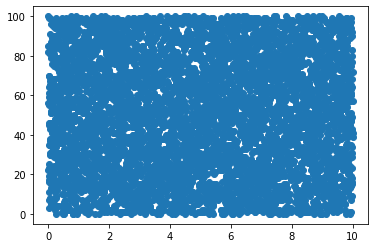

In [12]:
plt.scatter(np.linspace(0,10,len(data)),round(data['minutes_play']))

Text(0, 0.5, 'User Count')

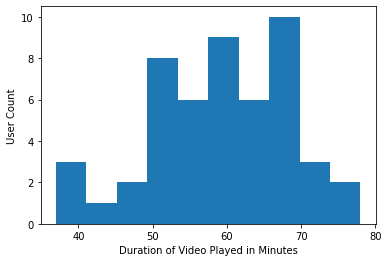

In [13]:
  data['minutes_play_integers'] = round(data['minutes_play'])
  plot_df = data.groupby('minutes_play_integers')['user_id'].count()
  ax = plot_df.head(n=50).plot(x="minutes_play_integer", y="user_id", kind="hist")
  ax.set_xlabel("Duration of Video Played in Minutes")
  ax.set_ylabel("User Count")

In [14]:
def plot_dist_players(data):
  data['minutes_play_integers'] = round(data['minutes_play'])
  plot_df = data.groupby('minutes_play_integers')['user_id'].count()
  ax = plot_df.head(n=50).plot(x="minutes_play_integer", y="user_id", kind="hist")
  ax.set_xlabel("Duration of Video Played in Minutes")
  ax.set_ylabel("User Count")
  return ax


In [15]:
data

,user_id,version,minutes_play,day_1_active,day_7_active,minutes_play_integers
0,1,control,82.052664,0.0,0.0,82.0
1,2,control,55.901351,0.0,1.0,56.0
2,3,control,84.936127,0.0,1.0,85.0
3,4,control,99.596730,1.0,0.0,100.0
4,5,control,21.906248,0.0,0.0,22.0
...,...,...,...,...,...,...
995,5996,treatment_5,23.310829,1.0,0.0,23.0
996,5997,treatment_5,38.659476,1.0,0.0,39.0
997,5998,treatment_5,57.478951,1.0,0.0,57.0
998,5999,treatment_5,41.115104,0.0,0.0,41.0


<AxesSubplot:xlabel='Duration of Video Played in Minutes', ylabel='User Count'>

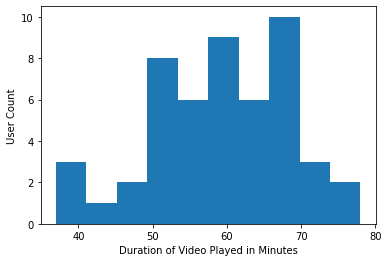

In [16]:
plot_dist_players(data)

In [17]:
def boot_means(data):
    boot_means = []
    for i in range(10000):
        boot_sample = data.sample(frac=1, replace=True).groupby('version')['day_1_active'].mean()
        boot_means.append(boot_sample)
    boot_means = pd.DataFrame(boot_means)
    return boot_means


In [21]:
def boot_means_diff(data):
    boot_means['diff'] = (boot_means['treatment'] - boot_means['control']) / boot_means['control'] * 100
    return boot_means_diff
